# WeatherPy

In [77]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress
from pprint import pprint
# Import API key
from config import open_weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Build DataFrame to store information
weather_df = pd.DataFrame({"City":cities})
weather_df["Lat"]=""
weather_df["Lng"]=""
weather_df["Max Temp"]=""
weather_df["Humidity"]=""
weather_df["Cloudiness"]=""
weather_df["Wind Speed"]=""
weather_df["Country"]=""
weather_df["Date"]=""

#Light parameter setting
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

print("Beginning Data Retrieval")
print("-----------------------------")
#Iterate through the weather_df, saving info as its retrieved

for index,row in weather_df.iterrows():
    city = row['City']
    params = {'appid':open_weather_api_key,
             'units':units,
             'q':city}
    response = requests.get(url,params=params).json()
    try:
        print(f'Processing Record {index+1} of Set 1 | {city}')
        c_lat = response["coord"]["lat"]
        c_lng = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        wind = response["wind"]["speed"]
        country = response["sys"]["country"]
        date = response["dt"]
        clouds = response['clouds']['all']
        weather_df.loc[index,"Lat"]=c_lat
        weather_df.loc[index,"Lng"]=c_lng
        weather_df.loc[index,"Humidity"]=humidity
        weather_df.loc[index,"Max Temp"]=max_temp
        weather_df.loc[index,"Humidity"]=humidity
        weather_df.loc[index,"Cloudiness"]=clouds
        weather_df.loc[index,"Wind Speed"]=wind
        weather_df.loc[index,"Country"]=country
        weather_df.loc[index,"Date"]=date
    except:
        print(f"{city} not found. Skipping...")
        pass


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | tumannyy
tumannyy not found. Skipping...
Processing Record 2 of Set 1 | sedelnikovo
sedelnikovo not found. Skipping...
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | northam
Processing Record 5 of Set 1 | san ramon de la nueva oran
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | taolanaro
taolanaro not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | bud
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | suao
suao not found. Skipping...
Processing Record 13 of Set 1 | zhicheng
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | vanavara
Processing Record 17 of Set 1 | tianpeng
Processing Record 18 of Set 1 | catuday
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | g

Processing Record 182 of Set 1 | rawlins
Processing Record 183 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 184 of Set 1 | upernavik
Processing Record 185 of Set 1 | sattahip
Processing Record 186 of Set 1 | steamboat springs
Processing Record 187 of Set 1 | torbay
Processing Record 188 of Set 1 | plettenberg bay
Processing Record 189 of Set 1 | livingston
Processing Record 190 of Set 1 | talaya
Processing Record 191 of Set 1 | north bend
Processing Record 192 of Set 1 | walvis bay
Processing Record 193 of Set 1 | brae
Processing Record 194 of Set 1 | ngukurr
ngukurr not found. Skipping...
Processing Record 195 of Set 1 | okha
Processing Record 196 of Set 1 | pisco
Processing Record 197 of Set 1 | deputatskiy
Processing Record 198 of Set 1 | cidreira
Processing Record 199 of Set 1 | maniitsoq
Processing Record 200 of Set 1 | ahuimanu
Processing Record 201 of Set 1 | virginia beach
Processing Record 202 of Set 1 | airai
Processing Record 203 of S

Processing Record 363 of Set 1 | carnarvon
Processing Record 364 of Set 1 | aquiraz
Processing Record 365 of Set 1 | cockburn town
Processing Record 366 of Set 1 | deer lake
Processing Record 367 of Set 1 | camacari
Processing Record 368 of Set 1 | shahr-e babak
Processing Record 369 of Set 1 | sibolga
Processing Record 370 of Set 1 | necochea
Processing Record 371 of Set 1 | hongjiang
Processing Record 372 of Set 1 | paita
Processing Record 373 of Set 1 | sitka
Processing Record 374 of Set 1 | xiongzhou
Processing Record 375 of Set 1 | bilma
Processing Record 376 of Set 1 | puerto baquerizo moreno
Processing Record 377 of Set 1 | suchitoto
Processing Record 378 of Set 1 | poykovskiy
Processing Record 379 of Set 1 | grand river south east
grand river south east not found. Skipping...
Processing Record 380 of Set 1 | edenderry
Processing Record 381 of Set 1 | waingapu
Processing Record 382 of Set 1 | samusu
samusu not found. Skipping...
Processing Record 383 of Set 1 | tonj
Processing R

Processing Record 544 of Set 1 | fengzhen
Processing Record 545 of Set 1 | morondava
Processing Record 546 of Set 1 | eureka
Processing Record 547 of Set 1 | asosa
Processing Record 548 of Set 1 | metro
Processing Record 549 of Set 1 | bathsheba
Processing Record 550 of Set 1 | phangnga
Processing Record 551 of Set 1 | hommelvik
Processing Record 552 of Set 1 | san juan
Processing Record 553 of Set 1 | shebunino
Processing Record 554 of Set 1 | pine bluff
Processing Record 555 of Set 1 | curup
Processing Record 556 of Set 1 | andenes
Processing Record 557 of Set 1 | byron bay
Processing Record 558 of Set 1 | sibu
Processing Record 559 of Set 1 | vestmannaeyjar
Processing Record 560 of Set 1 | lumut
Processing Record 561 of Set 1 | makurdi
Processing Record 562 of Set 1 | mananara
Processing Record 563 of Set 1 | ostrovnoy
Processing Record 564 of Set 1 | puerto escondido
Processing Record 565 of Set 1 | slave lake
Processing Record 566 of Set 1 | sayyan
Processing Record 567 of Set 1 |

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [135]:
#Saving weather_df to limit calls to OpenWeather API
weather_df.to_csv(output_data_file,index=False)
#Display weather dataframe
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tumannyy,,,,,,,,
1,sedelnikovo,,,,,,,,
2,kaitangata,-46.2817,169.8464,38.52,89,91,10.87,NZ,1659214586
3,northam,51.0333,-4.2167,65.39,98,100,14.23,GB,1659214586
4,san ramon de la nueva oran,-23.1322,-64.326,74.43,27,11,3.36,AR,1659214587


# Summary Statistics

In [138]:
#Read in saved dataframe to avoid having to rerun previous cells
saved_weather_df = pd.read_csv(output_data_file)

#First clean up of weather_df to exclude cities not found
clean_weather_df = saved_weather_df.loc[weather_df["Lat"]!='',:]

#Save cleaned up dataframe for later use
clean_weather_df.to_csv("../output_data/clean_cities.csv",index=False)

#Convert dtypes
clean_weather_df = clean_weather_df.astype({"Lat":float,"Lng":float,"Max Temp":float,"Humidity":float,
                             "Cloudiness":float,"Wind Speed":float,"Date":float})

In [28]:
summary_df = clean_weather_df.describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,21.119917,17.447151,70.287714,71.239092,56.666667,7.773909,1.659215e+09
std,32.426727,90.182762,13.865378,21.751467,39.011683,5.576699,9.286780e+01
min,-54.800000,-175.200000,31.240000,12.000000,0.000000,0.000000,1.659214e+09
25%,-5.198900,-59.650000,60.460000,61.000000,16.000000,3.440000,1.659215e+09
50%,27.117200,23.041200,72.860000,77.000000,65.000000,6.440000,1.659215e+09
75%,48.000000,98.529800,79.930000,88.000000,98.000000,10.600000,1.659215e+09
max,78.218600,179.316700,102.180000,100.000000,100.000000,30.420000,1.659215e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [139]:
#Time to address humidity > 100
humidity_outliers = clean_weather_df.loc[clean_weather_df["Humidity"]>100,:]
humidity_outliers
#No Humidity > 100

#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

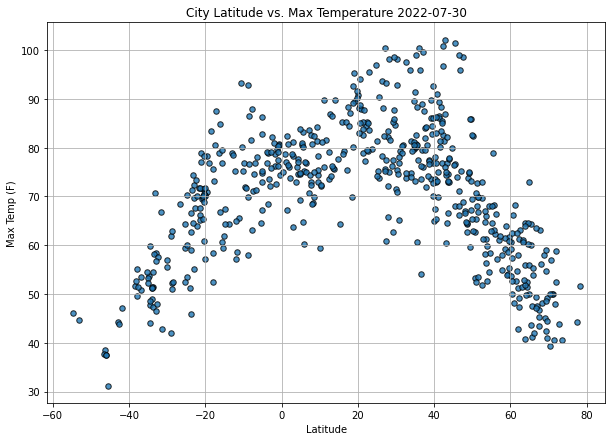

In [140]:
today = date.today()
clean_weather_df.plot(kind="scatter",x="Lat",y="Max Temp",title = f"City Latitude vs. Max Temperature {today}",
                     grid = True,figsize=(10,7),xlabel="Latitude",ylabel="Max Temp (F)",s=30,edgecolor="black",alpha=0.80)

plt.savefig("../Images/lat_v_temp.png")
plt.show()

The code above takes the maximum temperatures at the city latidudes and graphs it as a scatter plot. 0 Latitude is the equator, latitudes < 0 depict the southern hemisphere, latitudes > 0 depict the northern hemisphere. Temperatures fall as you move away from the equator. The graph is saved as png file in the Images folder.

## Latitude vs. Humidity Plot

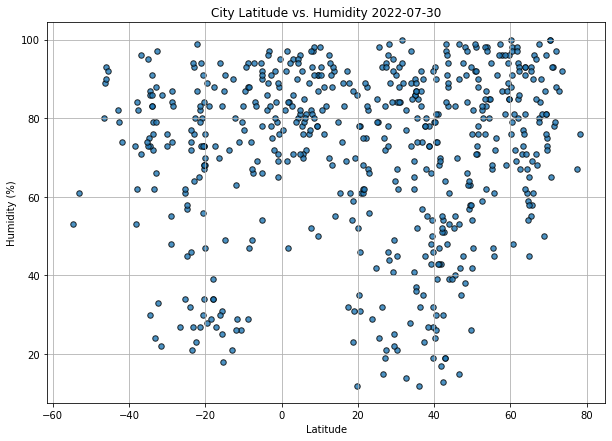

In [141]:
clean_weather_df.plot(kind="scatter",x="Lat",y="Humidity",title = f"City Latitude vs. Humidity {today}",
                     grid = True,figsize=(10,7),xlabel="Latitude",ylabel="Humidity (%)",s=30,edgecolor="black",alpha=0.80)
plt.savefig("../Images/lat_v_humidity.png")
plt.show()

The code above plots latitude and humidity in a scatter plot. No real observable trends. The graph is saved as a png file in the Images folder.

## Latitude vs. Cloudiness Plot

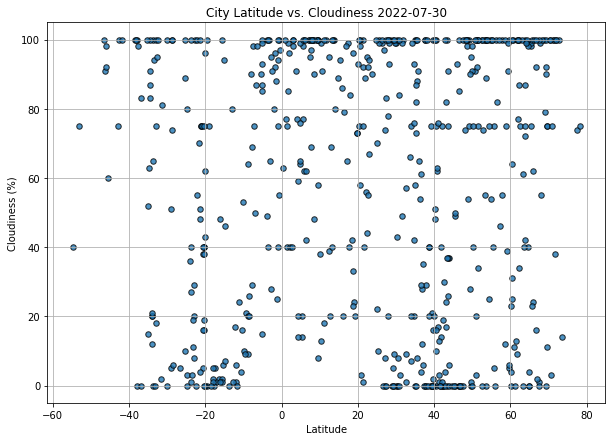

In [142]:
clean_weather_df.plot(kind="scatter",x="Lat",y="Cloudiness",title = f"City Latitude vs. Cloudiness {today}",
                     grid = True,figsize=(10,7),xlabel="Latitude",ylabel="Cloudiness (%)",
                      s=30,edgecolor="black",alpha=0.80)
plt.savefig("../Images/lat_v_cloud.png")
plt.show()

The code above plots latitude and cloudiness in a scatter plot. No real observable trends. The graph is saved as png file in the Images folder.

## Latitude vs. Wind Speed Plot

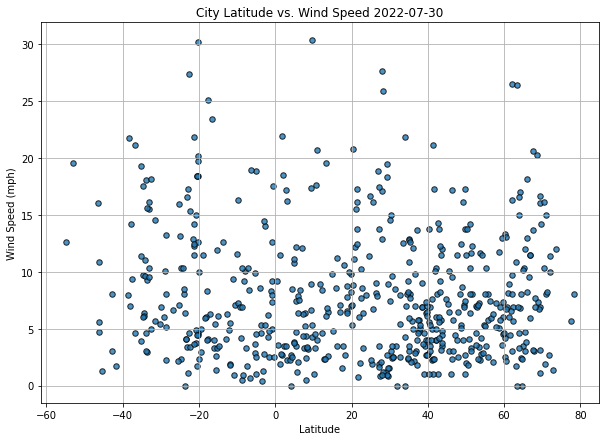

In [143]:
clean_weather_df.plot(kind="scatter",x="Lat",y="Wind Speed",title = f"City Latitude vs. Wind Speed {today}",
                     grid = True,figsize=(10,7),xlabel="Latitude",ylabel="Wind Speed (mph)",
                      s=30,edgecolor="black",alpha=0.80)
plt.savefig("../Images/lat_v_wind.png")
plt.show()

The code above plots latitude and wind speed in a scatter plot. No real observable trends. The graph is saved as png file in the Images folder.

## Linear Regression

In [144]:
n_hemisphere = clean_weather_df.loc[clean_weather_df["Lat"]>=0,:]
s_hemisphere = clean_weather_df.loc[clean_weather_df["Lat"]<=0,:]

def linear_regress_calc(x_values,y_values,x_label,y_label,hemisphere, line_placement):
    (slope,intercept,rvalue,pvalue,stderr)=linregress(x_values,y_values)
    regress_values = x_values*slope+intercept
    line_eq=f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.figure(figsize=(10,7))
    plt.scatter(x_values,y_values,s=30,edgecolor="black",alpha=0.80)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    today = date.today()
    plt.title(f'{hemisphere} Hemisphere Latitide v. {y_label} {today}')
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    print(f'The r value is: {str(rvalue)}')
    plt.savefig(f'../Images/{hemisphere}_hemisphere_{y_label}.png')
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.6318866656224587


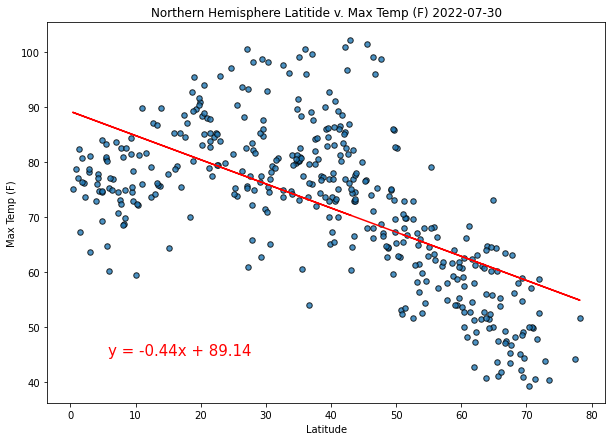

In [145]:
x_values = n_hemisphere["Lat"]
y_values = n_hemisphere["Max Temp"]
linear_regress_calc(x_values,y_values,"Latitude","Max Temp (F)","Northern", (5.8,45))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.8013541816469726


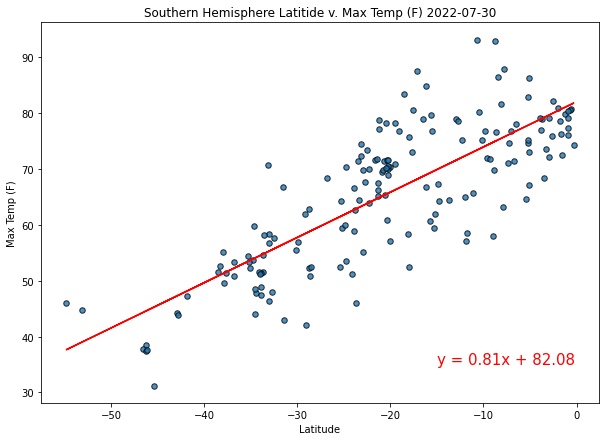

In [146]:
x_values = s_hemisphere["Lat"]
y_values = s_hemisphere["Max Temp"]
linear_regress_calc(x_values,y_values,"Latitude","Max Temp (F)","Southern", (-15,35))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.03630074893983864


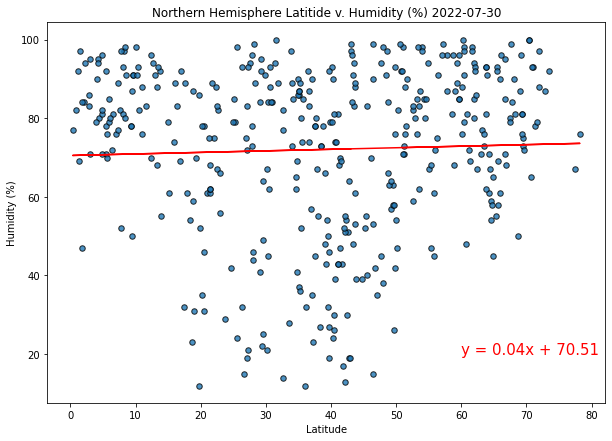

In [147]:
x_values = n_hemisphere["Lat"]
y_values = n_hemisphere["Humidity"]
linear_regress_calc(x_values,y_values,"Latitude","Humidity (%)","Northern", (60,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.05022161627755086


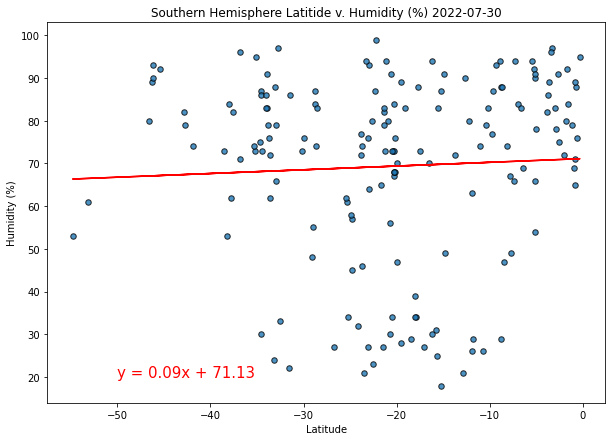

In [148]:
x_values = s_hemisphere["Lat"]
y_values = s_hemisphere["Humidity"]
linear_regress_calc(x_values,y_values,"Latitude","Humidity (%)","Southern", (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.0815409478628748


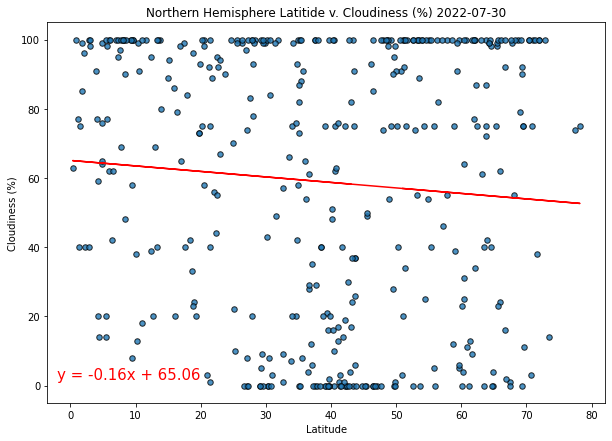

In [149]:
x_values = n_hemisphere["Lat"]
y_values = n_hemisphere["Cloudiness"]
linear_regress_calc(x_values,y_values,"Latitude","Cloudiness (%)","Northern", (-2,2))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: -0.04201312967831234


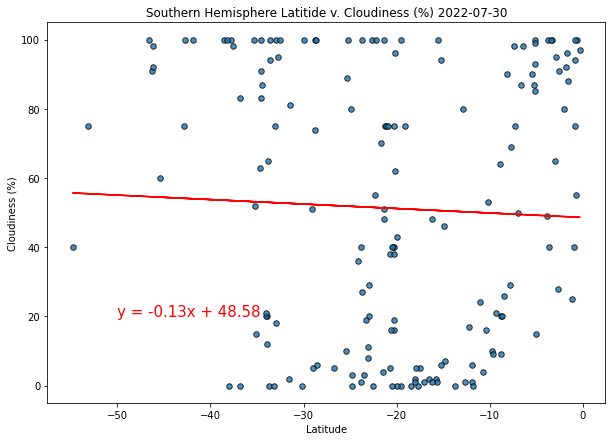

In [150]:
x_values = s_hemisphere["Lat"]
y_values = s_hemisphere["Cloudiness"]
linear_regress_calc(x_values,y_values,"Latitude","Cloudiness (%)","Southern", (-50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.03709561548060043


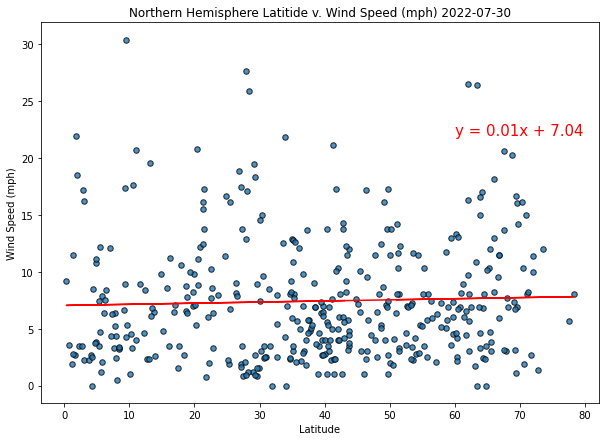

In [151]:
x_values = n_hemisphere["Lat"]
y_values = n_hemisphere["Wind Speed"]
linear_regress_calc(x_values,y_values,"Latitude","Wind Speed (mph)","Northern", (60,22))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.19332961601859522


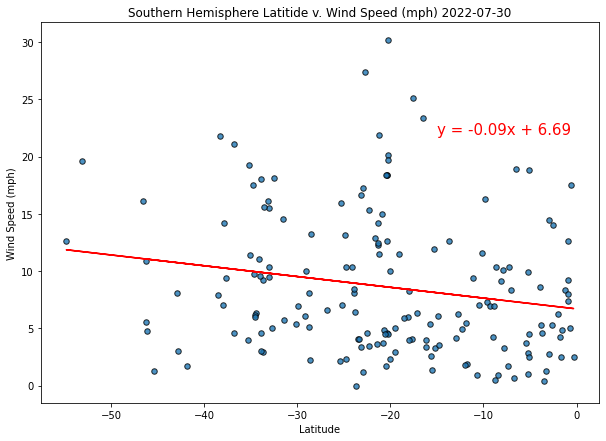

In [152]:
x_values = s_hemisphere["Lat"]
y_values = s_hemisphere["Wind Speed"]
linear_regress_calc(x_values,y_values,"Latitude","Wind Speed (mph)","Southern", (-15,22))

# Observations

1. Temperature in the northern hemisphere tends to have a negative correlation with latitude, i.e. temperature decreases as you move away from the equator. The r value is 0.63, indicating a moderate strength of correlation.
2. Temperature in the southern hemisphere tend to have a positive correlation with latitude, i.e. temperature increases as you move closer to the equator. The r value is 0.80, indicating a strong strength of correlation.
3. There appears to be no correlation between humitidy and latitude. The r values for both northern and southern hemispheres are less than 0.3, indicating little to no correlation.
4. There appears to be no correlation between cloudiness and latitude. The r values for both northern and southern hemispheres are less than 0.3, indicating little to no correlation.
5. At the time the data was collected, it was more cloudy and more humid in the northern hemisphere than in the southern hemisphere. This may correspond with the seasonal differences between the two hemispheres. From April to September, the rain belt is in the nothern hemisphere, while the southern hemisphere experiences a dry season. 
6. While there appears to be no correlation between latitudes and wind speed, wind speed at the equator tends to be lower than at the poles.